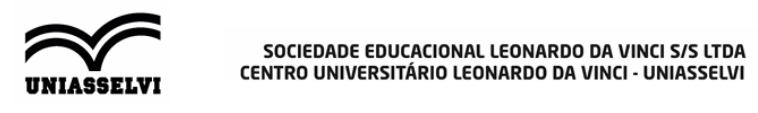

**Nome do Acadêmico:** Adjalma MAchado Aguiar Junior

**Matrícula:** 3315234

## Classificação de Pacientes com Diabetes


<p align="justify">Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de saúde. Com dados médicos de uma pessoa, um algoritmo pode classificar e identificar se uma pessoa possui ou não diabetes, auxiliando um médico na examinação de um paciente de forma que ele seja mais preciso, e eficiente. Não só isso, algoritmos de machine learning podem trazer novos insights no diagnóstico de pacientes, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do paciente. Na área da saúde, é de extrema importância que haja o mínimo de falsos negativos possíveis, não seria nada ideal que um paciente com diabetes não fosse diagnosticado e tratado devidamente. Portanto um dos grandes desafios é encontrar modelos e algoritmos que equilibram a precisão com uma baixa taxa de falso negativo. Esse estudo busca aprofundar no diagnóstico de pacientes com suspeitas de diabetes, com dados comuns de consultas médicas, como idade do paciente e sua pressão sanguínea. Os dados são da National Institute of Diabetes and Digestive and Kidney Diseases nos Estados Unidos. Todos os sujeitos nos dados são mulheres nativo-americanas com pelo menos 21 anos. Uma das dificuldades dessa base de dados é a falta de dados para algumas variáveis, que precisam ser preenchidas, e a baixa quantia de dados (768 exemplos).</p>

## Objetivo

<p align="justify"> Esse projeto tem como objetivo aplicar métodos de processamento e engenharia de dados para a limpeza e preenchimento de dados faltantes, assim como usar métodos de Machine Learning para ter um diagnóstico preciso dos pacientes, sem arriscar falsos negativos.</p>

## Especificação Técinca

<p align="justify">

**Dataset:** Para esse projeto vamos usar o dataset da National Institute of Diabetes and Digestive and Kidney Diseases, com análise de 768 mulheres nativo-americanas do povo Pima, com pelo menos 21 anos. Os dados podem sen encontrados aqui: < https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database > 

**Formato:** A base de dados está em formato CSV com 9 colunas: Number of times pregnant, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.

Todos, menos a coluna Outcome, serão utilizados como features para nosso modelo. Outcome é a feature booleana que indica se a pessoa possui ou não diabetes (0 ou 1), e será o objetivo de previsão dos nosso algoritmos de machine learning.

**Combinações para treinamento e teste será:** 70% treino e 30% teste.

**Descrição das Features**

Number of times Pregnant: Vezes em que a mulher engravidou

Glucose: Concentração de glicose no sangue, 2 horas em teste de tolerância à glicose

BloodPressure: Pressão sanguínea diastólica

SkinThickness: Espessura da dobra cutânea do tríceps, em milímetros

Insulin: Nível de insulina em 2 horas de teste de insulina ( mu⋅U/ml )

BMI: índice de massa corporal, peso em Kg e altura em metros

Age: Idade da mulher

Outcome: Veredito se a pessoa possui ou não diabetes (0 ou 1)

**Métodos de Pré-Processamento:** Como temos poucos exemplos para trabalhar, não podemos remover os dados nulos ou em branco. Portanto vamos fazer preenchimento dos dados com a Mediana, e tentar basear a mediana em dados correlacionados, como idade. Ou seja, vamos preencher os dados de acordo com a idade ou outro fator correlacionado com aquele conjunto de dados, de forma a fazer os dados preenchidos mais próximo da realidade. Também usaremos a técnica de pesos para classes, dando mais importância a classe minoria do dataset, para corrigir desbalanceamento entre classes.


**Tarefa de Aprendizado:** Será aplicado a tarefa de Classificação.

**Modos de aprendizado:** Supervisionado.

**Algoritmos Avaliados:** Regressão Logística, SVM, Random Forest

**Métrica utilizadas:** Precisão, Matriz confusão, Revocação, score F1 
</p> 



## Pré-Processamento

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import confusion_matrix

Visão geral dos dados com uma análise exploratória rápida

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print('____VALORES NULOS____')
for column in df.columns :
    print(column,' - ', df[f'{column}'].isnull().sum())

____VALORES NULOS____
Pregnancies  -  0
Glucose  -  0
BloodPressure  -  0
SkinThickness  -  0
Insulin  -  0
BMI  -  0
DiabetesPedigreeFunction  -  0
Age  -  0
Outcome  -  0


In [ ]:
print('____VALORES ZERO____')
for column in df.columns :
    zeros =  df[df[f'{column}']==0].shape[0]
    print(column,' - ',zeros)


____VALORES ZERO____
Pregnancies  -  111
Glucose  -  5
BloodPressure  -  35
SkinThickness  -  227
Insulin  -  374
BMI  -  11
DiabetesPedigreeFunction  -  0
Age  -  0
Outcome  -  500


Correlação entre as variáveis

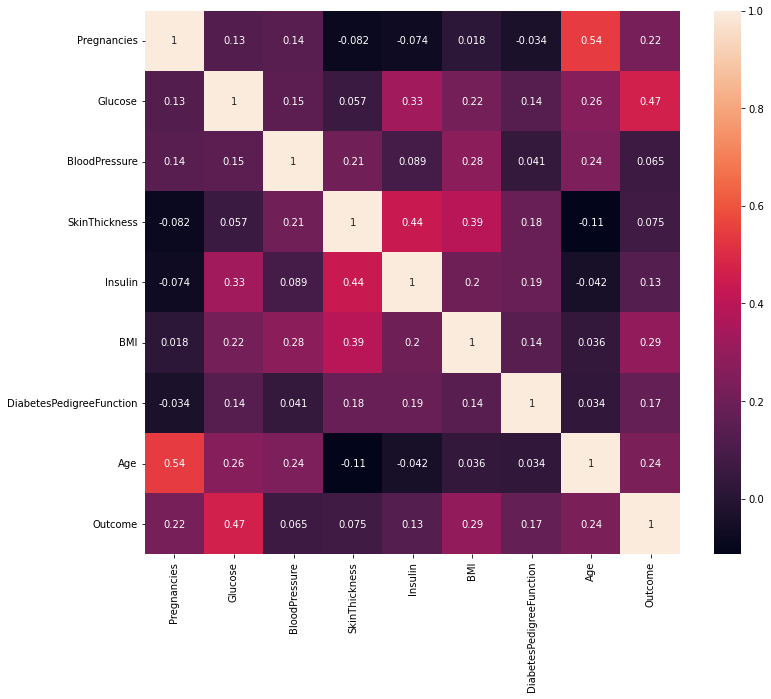

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True)

Observando desbalanceamento entre as classes

In [ ]:
print(f'Classe 0: {df[df["Outcome"]==0].shape[0]}')
print(f'Classe 1: {df[df["Outcome"]==1].shape[0]}')

Classe 0: 500
Classe 1: 268


**Aplicando métodos de pré processamento**

Método 1: Preenchendo valores faltantes

  Observamos que algumas variáveis possuem valor 0 onde não deveriam, essas sendo:

  **Glucose, Insulin, BloodPressure, SkinThickness, BMI**

  Como temos poucos exemplos nesse dataset, remover os dados não é uma opção. Precisamos preencher os dados com a mediana. Faremos isso iterando pelas idades, e pegando exemplos na faixa etária de 10 anos acima e 10 anos abaixo, então fazemos a mediana dessa faixa etária e corrigimos os valores 0. Também vamos separar entre pessoas com e sem diabetes, para que os valores de uma classe ou outra não se misture.

In [ ]:
fix_columns = ['Insulin','SkinThickness','BloodPressure', 'BMI', 'Glucose']
for fix_column in fix_columns:


    for age in df['Age'].unique():
        small = df.copy()[(df['Age'] > age-10) & (df['Age'] < age+10)]
        
        sample = df.loc[df['Age']==age]
        sample = sample.loc[sample[fix_column] == 0]
    
            

        for row in sample.index:

            if sample.loc[row]['Outcome'] ==0:

                df.loc[row, fix_column] = small[small['Outcome']==0][fix_column].median()

            else: df.loc[row, fix_column] = small[small['Outcome']==1][fix_column].median()


Em alguns poucos casos a mediana ainda será 0 e nosso problema não terá sido resolvido. Esse resto preenchemos com a mediana do dataset.

In [ ]:
for fix_column in fix_columns:
  sample = df.loc[df[fix_column] == 0]

  for row in sample.index:
    

    if sample.loc[row]['Outcome'] ==0:
        df.loc[row, fix_column] = df[df['Outcome']==0][fix_column].median()

        
    else:
        df.loc[row, fix_column] = df[df['Outcome']==1][fix_column].median()


In [ ]:
print('____VALORES ZERO____')
for column in df.columns :
    zeros =  df[df[f'{column}']==0].shape[0]
    print(column,' - ',zeros)

____VALORES ZERO____
Pregnancies  -  111
Glucose  -  0
BloodPressure  -  0
SkinThickness  -  0
Insulin  -  0
BMI  -  0
DiabetesPedigreeFunction  -  0
Age  -  0
Outcome  -  500


Método 2: Lidando com classes desbalanceadas

Precisamos balancear a diferença entre a quantidade de uma classe pra outra, ou seja, balancear a quantidade de exemplos que tem diabetes com a quantidade de exemplos que não tem diabetes. Faremos isso associando um peso/importãncia a classe minoritária, de forma que o modelo tenha uma punição maior por errar a previsão daquela classe.

In [ ]:
X = df.drop('Outcome',axis=1)
y = df[['Outcome']]

class0w = y.shape[0]/(2 * y[y['Outcome']==0].shape[0])
class1w = y.shape[0]/(2 * y[y['Outcome']==1].shape[0])

class_weights = {0:class0w, 1:class1w}

print(f'Peso classe 0: {class0w}')
print(f'Peso classe 1: {class1w}')

Peso classe 0: 0.768
Peso classe 1: 1.4328358208955223


Método 3: Normalizando os dados

Agora vamos normalizar os dados usando Standard Scaler, que subtrai cada exemplo Xi pela média do conjunto X, e divide o resultado pelo desvio padrão do conjunto X. Fazendo com que o conjunto de dados tenha média 0 e seja mensurado em unidades de desvio padrão, fazendo a distribuição dos dados ser mais próximo de uma distribuição normal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Resultados e Predição

Vamos estar avaliando 3 modelos. Regressão Logística, Support Vector Machine, e Random Forest. Com Random Forest não usamos peso de classe pois ele performa melhor sem. 

As métricas usadas vão ser Revocação, Precisão e F1 score

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0, n_jobs=-1)
svm = SVC(max_iter=2000, class_weight=class_weights, random_state=0)
lg = LogisticRegression(class_weight=class_weights, random_state=0)

rf_classifier.fit(X_train,y_train)
svm.fit(X_train,y_train)
lg.fit(X_train,y_train)
print('Regressão Logística\n')
print(metrics.classification_report(lg.predict(X_test), y_test))
print('SVM\n')
print(metrics.classification_report(svm.predict(X_test), y_test))
print('Random Forest\n')
print(metrics.classification_report(rf_classifier.predict(X_test), y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regressão Logística

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.59      0.62        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

SVM

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       143
           1       0.80      0.67      0.73        88

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

Random Forest

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.81      0.85      0.83        71

    accuracy                           0.89       231
   macro avg       0.87      0.88      0.87       231
weighted avg       0.89      0.89

O modelo Random Forest parece ser claramente a nossa melhor escolha, vamos fazer a matriz confusão desse modelo.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

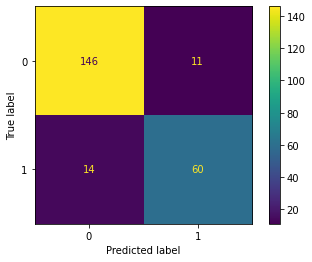

In [ ]:

plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier, X_test, y_test)

plt.show()

Agora avaliamos como podemos diminuir os falsos negativos, de forma que a chance de uma pessoa diabética não ser devidamente diagnosticada seja mínimo. Faremos isso com um limite, caso a probabilidade da pessoa ser diabética passar desse limite, diagnosticamos como uma pessoa diabética.

In [ ]:
yhat = rf_classifier.predict_proba(X_test)

yhat = yhat[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, yhat)

fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)

print('Melhor Parâmetro=%f, F-Score=%.3f, Revocação=%.3f, Precisão=%.3f' % (thresholds[ix], fscore[ix],recall[ix],precision[ix]))

Melhor Parâmetro=0.329649, F-Score=0.852, Revocação=0.973, Precisão=0.758


Nosso limite então vai ser 0.329, já que a taxa de falsos negativos é baixíssima, com 97% dos casos de diabete sendo devidamente diagnosticados.

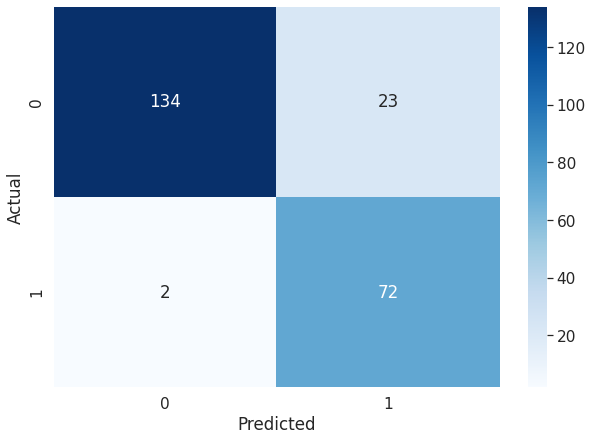

In [ ]:
def prediction(prob):
    if prob >= 0.329649: return 1
    else: return 0

probs = rf_classifier.predict_proba(X_test)[:, 1]

predic = [(prediction(c)) for c in probs]

data = confusion_matrix(y_test, predic)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')